In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math

The description of Liking Data is as folllows: Relative reinforcing value data showing how children rated how much they would want to perform both physical and sedentary activities on a scale of 1-10 at baseline, week 6, and week 10. In Liking data, the rows are as follows: Volunteer, Week, group, Trad, AVG_T, Sed, AVG_S

Volunteer: This column likely contains an identifier for each individual participant in the study (e.g. a unique participant ID).
Week: This column likely contains the week number corresponding to each set of liking ratings provided by each participant (baseline, week 6, or week 10).
Group: This column likely indicates which group each participant was assigned to (e.g. the AVG group or the control group).
Trad: This column likely contains the participant's rating of how much they liked performing traditional physical activities (i.e. physical activities that do not involve a video game component) on a scale of 1-10.
AVG_T: This column likely contains the participant's rating of how much they liked performing physical activity while playing the active video game (AVG) on a scale of 1-10.
Sed: This column likely contains the participant's rating of how much they liked engaging in sedentary activities (i.e. activities that involve sitting or lying down) on a scale of 1-10.
AVG_S: This column likely contains the participant's rating of how much they liked playing sedentary video games (SVGs) on a scale of 1-10.

In [2]:
data=pd.read_csv("liking data.csv")

In [3]:
data

,Volunteer,Week,group,Trad,AVG_T,Sed,AVG_S
0,406-0003,bsl,0,9.0,9.0,6.0,9.0
1,406-0003,wk06,0,10.0,8.0,8.0,9.0
2,406-0003,wk10,0,9.0,10.0,10.0,9.0
3,406-0005,bsl,0,8.0,10.0,10.0,10.0
4,406-0005,wk06,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
146,406-0115,wk06,1,7.0,10.0,7.0,8.0
147,406-0115,wk10,1,6.0,5.0,4.0,6.0
148,406-0117,bsl,0,7.0,6.0,8.0,6.0
149,406-0117,wk06,1,8.0,10.0,9.0,9.0


In [4]:
bsl_data = data[data['Week'] == 'bsl']

# display the resulting DataFrame
bsl_data

,Volunteer,Week,group,Trad,AVG_T,Sed,AVG_S
0,406-0003,bsl,0,9.0,9.0,6.0,9.0
3,406-0005,bsl,0,8.0,10.0,10.0,10.0
6,406-0007,bsl,1,8.0,7.0,10.0,9.0
9,406-0009,bsl,0,1.0,4.0,10.0,10.0
12,406-0011,bsl,0,8.0,9.0,9.0,8.0
15,406-0015,bsl,1,10.0,7.0,9.0,5.0
18,406-0017,bsl,1,8.0,9.0,8.0,9.0
21,406-0019,bsl,1,7.0,9.0,5.0,8.0
24,406-0021,bsl,1,8.0,8.0,8.0,9.0
27,406-0023,bsl,0,5.0,NaN,NaN,NaN


In [5]:
wk06_data = data[data['Week'] == 'wk06']

# display the resulting DataFrame
wk06_data

,Volunteer,Week,group,Trad,AVG_T,Sed,AVG_S
1,406-0003,wk06,0,10.0,8.0,8.0,9.0
4,406-0005,wk06,0,NaN,NaN,NaN,NaN
7,406-0007,wk06,1,9.0,9.0,10.0,10.0
10,406-0009,wk06,0,5.0,10.0,10.0,10.0
13,406-0011,wk06,0,8.0,10.0,10.0,10.0
16,406-0015,wk06,1,10.0,10.0,3.0,10.0
19,406-0017,wk06,1,9.0,8.0,6.0,8.0
22,406-0019,wk06,1,8.0,6.0,2.0,9.0
25,406-0021,wk06,1,9.0,9.0,9.0,9.0
28,406-0023,wk06,0,10.0,10.0,10.0,8.0


In [6]:
wk10_data = data[data['Week'] == 'wk10']

# display the resulting DataFrame
wk10_data

,Volunteer,Week,group,Trad,AVG_T,Sed,AVG_S
2,406-0003,wk10,0,9.0,10.0,10.0,9.0
5,406-0005,wk10,0,NaN,NaN,NaN,NaN
8,406-0007,wk10,1,9.0,9.0,8.0,9.0
11,406-0009,wk10,0,5.0,10.0,10.0,9.0
14,406-0011,wk10,0,9.0,9.0,10.0,9.0
17,406-0015,wk10,1,10.0,10.0,10.0,10.0
20,406-0017,wk10,1,7.0,8.0,5.0,8.0
23,406-0019,wk10,1,7.0,NaN,2.0,7.0
26,406-0021,wk10,1,10.0,9.0,10.0,9.0
29,406-0023,wk10,0,5.0,9.0,10.0,10.0


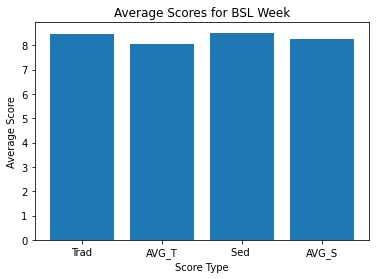

In [7]:
avg_scores = bsl_data[['Trad', 'AVG_T', 'Sed ', 'AVG_S']].mean()

# plot the average scores as a bar chart
plt.bar(avg_scores.index, avg_scores.values)
plt.xlabel('Score Type')
plt.ylabel('Average Score')
plt.title('Average Scores for BSL Week')
plt.show()

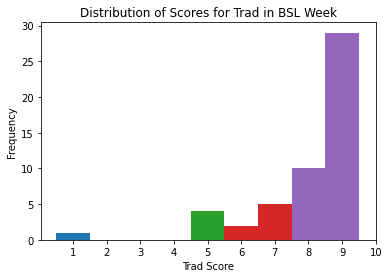

In [8]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(bsl_data['Trad'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('Trad Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Trad in BSL Week')
plt.show()

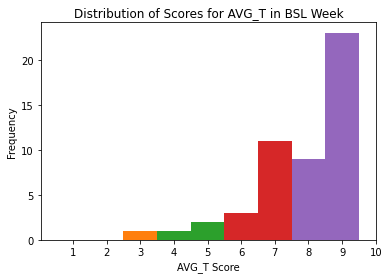

In [9]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(bsl_data['AVG_T'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('AVG_T Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for AVG_T in BSL Week')
plt.show()

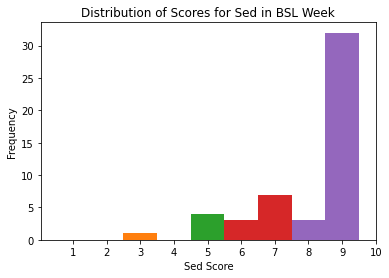

In [10]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(bsl_data['Sed '], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('Sed Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Sed in BSL Week')
plt.show()

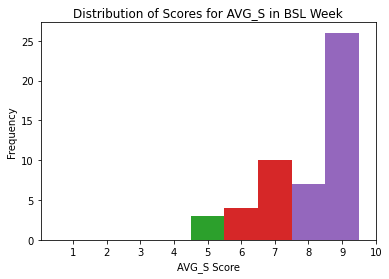

In [11]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(bsl_data['AVG_S'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('AVG_S Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for AVG_S in BSL Week')
plt.show()

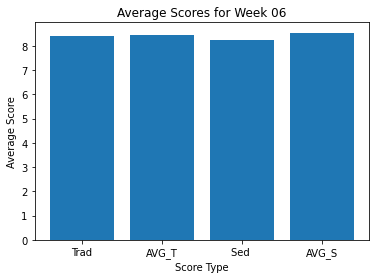

In [12]:
avg_scores = wk06_data[['Trad', 'AVG_T', 'Sed ', 'AVG_S']].mean()

# plot the average scores as a bar chart
plt.bar(avg_scores.index, avg_scores.values)
plt.xlabel('Score Type')
plt.ylabel('Average Score')
plt.title('Average Scores for Week 06')
plt.show()

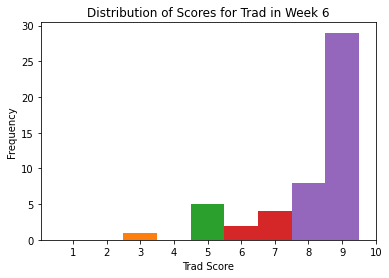

In [13]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk06_data['Trad'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('Trad Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Trad in Week 6')
plt.show()

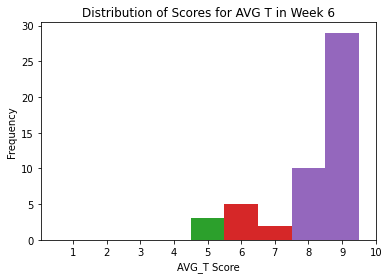

In [14]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk06_data['AVG_T'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('AVG_T Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for AVG T in Week 6')
plt.show()

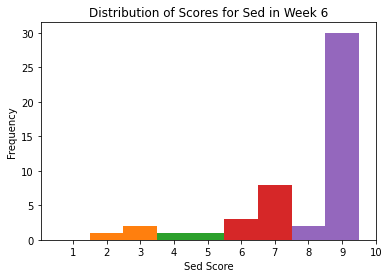

In [15]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk06_data['Sed '], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('Sed Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Sed in Week 6')
plt.show()

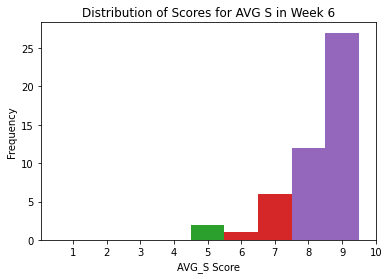

In [16]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk06_data['AVG_S'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('AVG_S Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for AVG S in Week 6')
plt.show()

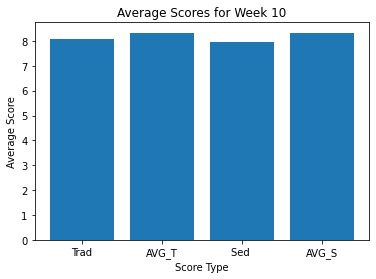

In [17]:
avg_scores = wk10_data[['Trad', 'AVG_T', 'Sed ', 'AVG_S']].mean()

# plot the average scores as a bar chart
plt.bar(avg_scores.index, avg_scores.values)
plt.xlabel('Score Type')
plt.ylabel('Average Score')
plt.title('Average Scores for Week 10')
plt.show()

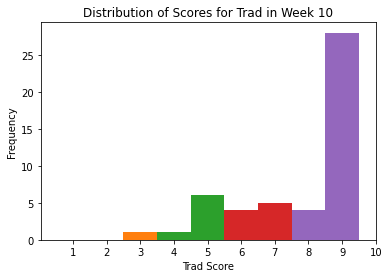

In [18]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk10_data['Trad'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('Trad Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Trad in Week 10')
plt.show()

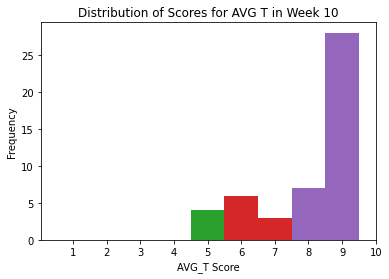

In [19]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk10_data['AVG_T'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('AVG_T Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for AVG T in Week 10')
plt.show()

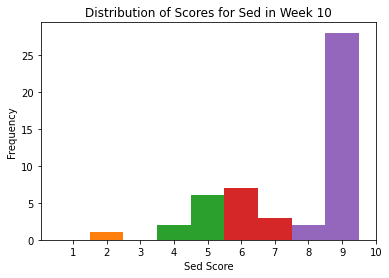

In [20]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk10_data['Sed '], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('Sed Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for Sed in Week 10')
plt.show()

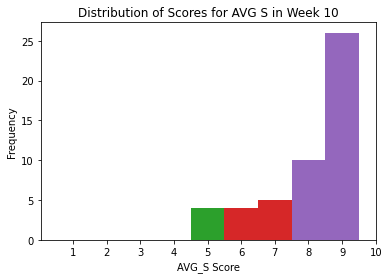

In [21]:
# create a histogram with 10 bins
bins = np.linspace(1, 10, 10)
histogram, bins = np.histogram(wk10_data['AVG_S'], bins=bins)

# create a list of colors for the bars based on which bin they belong to
colors = []
for i in range(len(bins)-1):
    if bins[i] < 2:
        colors.append('tab:blue')
    elif bins[i] < 4:
        colors.append('tab:orange')
    elif bins[i] < 6:
        colors.append('tab:green')
    elif bins[i] < 8:
        colors.append('tab:red')
    else:
        colors.append('tab:purple')

# plot the histogram with colored bars
plt.bar(bins[:-1], histogram, width=bins[1]-bins[0], color=colors)
plt.xticks(bins)
plt.xlabel('AVG_S Score')
plt.ylabel('Frequency')
plt.title('Distribution of Scores for AVG S in Week 10')
plt.show()

In [22]:
---

SyntaxError: invalid syntax (1947214667.py, line 1)